# CMSE 201 Final Project Template

### &#9989; Steven Kendall, Olivia Qiu, Aniessa Terpstra, Daniel Villalba, Qingyun Xu
### &#9989; Section_003
#### &#9989; 4/5/2022

# ___Modeling populations over time___

## Background and Motivation

_(Provide context for the problem.  **Clearly state the question(s) you set
out to answer.**)_

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.colors import ListedColormap,  LinearSegmentedColormap

In [2]:
usa = pd.read_csv("USA_pop.csv",delimiter=",")
usa

,year,population,yearly percent change,yearly change,migrants,fertility rate,density,death rate,growth rate
0,2020,331002651,0.0059,1937734,954806,1.78,36,0.008880,0.0059
1,2019,329064917,0.0060,1968652,954806,1.85,36,0.008782,0.0060
2,2018,327096265,0.0062,2011509,954806,1.85,36,0.008685,0.0062
3,2017,325084756,0.0064,2068761,954806,1.85,36,0.008580,0.0064
4,2016,323015995,0.0067,2137685,954806,1.85,35,0.008475,0.0067
5,2015,320878310,0.0076,2373367,992343,1.88,35,0.008369,0.0069
6,2010,309011475,0.0093,2803593,1085751,2.06,34,0.008138,0.0088
7,2005,294993511,0.0093,2656520,1066979,2.04,32,0.008362,0.0090
8,2000,281710909,0.0122,3309433,1771991,2.00,31,0.008603,0.0114
9,1995,265163745,0.0101,2608687,892751,2.03,29,0.008754,0.0111


<AxesSubplot:xlabel='year', ylabel='population'>

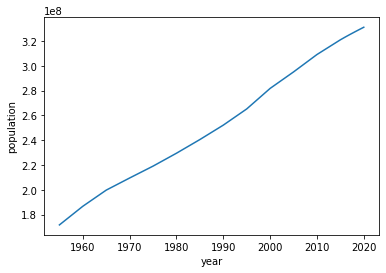

In [3]:
sns.lineplot(x = usa['year'],y = usa['population'])

In [4]:
class population():
    """This class is used to predict the natural population growth without the affect of immigrants."""
    def __init__(self,start,growth,migrants):
        self.start = start
        self.growth = growth
        self.migrants = migrants
        
    def update_pop(self,time):
        """
        This is the function we used to calculte population will be of a given time start, and growth without immigrants
        Time is the amount of time we want to predict
        """
        t, population = list(), list()
        "t: the time axis we want to return, population: our predicted population axis"
        for i in range(time):
            "population"
            pop = self.start + self.start*self.growth + self.migrants
            population.append(pop)
            self.start = pop
            
            "time"
            t.append(i+1955)
        return t, population

In [5]:
us = population(usa.iloc[17,1],usa.iloc[17,8],usa.iloc[17,4])
us_t,us_pop = us.update_pop(65)
print(usa.iloc[0,1]-us_pop[-1]) #actual minus predicted US population for 2020

-219946334.26370513


Text(0.5, 1.0, 'Real Population vs Predicted Population')

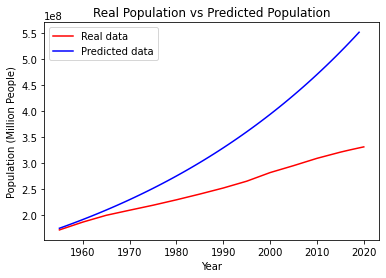

In [6]:
plt.plot(usa['year'], usa['population'], c = "red", label = "Real data")
plt.plot(us_t, us_pop, c = "blue", label = "Predicted data")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Population (Million People)")
plt.title("Real Population vs Predicted Population")

In [7]:
class population_v2():
    """This class is used to predict the natural population growth without the affect of immigrants."""
    def __init__(self,start, growth, death, migrants):
        self.start = start
        self.growth = growth
        self.death = death
        self.migrants = migrants
        
    def update_pop(self,time):
        """
        This is the function we used to calculte population will be of a given time start, and growth without immigrants
        Time is the amount of time we want to predict
        """
        t, population = list(), list()
        "t: the time axis we want to return, population: our predicted population axis"
        for i in range(time):
            "population"
            pop = self.start + self.start*self.growth - self.start*self.death + self.migrants
            population.append(pop)
            self.start = pop
            
            "time"
            t.append(i+1955)
        return t, population

In [19]:
us2 = population_v2(usa.iloc[17,1],usa.iloc[17,8],usa.iloc[17,7],usa.iloc[17,4])
us2_t,us2_pop = us2.update_pop(65)
print(usa.iloc[0,1]-us2_pop[-1]) #actual value minus the predicted value

28080362.064240694


Text(0.5, 1.0, 'Real Population vs Predicted V2 Population')

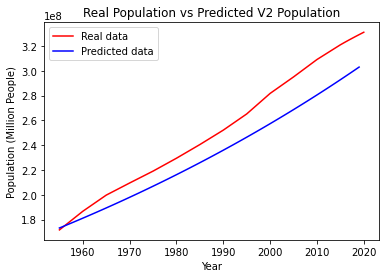

In [20]:
plt.plot(usa['year'], usa['population'], c = "red", label = "Real data")
plt.plot(us2_t, us2_pop, c = "blue", label = "Predicted data")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Population (Million People)")
plt.title("Real Population vs Predicted V2 Population")

In [10]:
corr = usa.corr()
corr.style.background_gradient(cmap="coolwarm")

,year,population,yearly percent change,yearly change,migrants,fertility rate,density,death rate,growth rate
year,1.000000,0.998800,-0.839426,-0.244973,0.743273,-0.776496,0.998064,-0.836651,-0.832470
population,0.998800,1.000000,-0.828831,-0.234213,0.738448,-0.750783,0.999122,-0.831489,-0.828002
yearly percent change,-0.839426,-0.828831,1.000000,0.695807,-0.432351,0.876541,-0.829642,0.601111,0.972115
yearly change,-0.244973,-0.234213,0.695807,1.000000,0.291823,0.446790,-0.234727,-0.082689,0.632229
migrants,0.743273,0.738448,-0.432351,0.291823,1.000000,-0.641754,0.738408,-0.802774,-0.463161
fertility rate,-0.776496,-0.750783,0.876541,0.446790,-0.641754,1.000000,-0.751413,0.732183,0.830742
density,0.998064,0.999122,-0.829642,-0.234727,0.738408,-0.751413,1.000000,-0.828924,-0.827552
death rate,-0.836651,-0.831489,0.601111,-0.082689,-0.802774,0.732183,-0.828924,1.000000,0.593895
growth rate,-0.832470,-0.828002,0.972115,0.632229,-0.463161,0.830742,-0.827552,0.593895,1.000000


In [11]:
y = usa["population"]
x = usa.drop(columns=["yearly percent change","yearly change","density","population"])

prediction = []
years = np.array(usa["year"])
for i in years:
    x_train = x[x["year"]<=i]
    x_test = x[x["year"]>i]
    y_train = y[x["year"]<=i]
    y_test = y[x["year"]>i]
    model = sm.OLS(y_train,x_train)
    results = model.fit()
    pred = results.predict(x_test)
    prediction.append(np.array(pred))

In [12]:
prediction

[array([], dtype=float64),
 array([2.99817389e+08]),
 array([2.94343688e+08, 3.01586612e+08]),
 array([2.89047893e+08, 2.96394240e+08, 3.01228299e+08]),
 array([2.84369483e+08, 2.91549035e+08, 2.96553883e+08, 3.02106833e+08]),
 array([2.80292638e+08, 2.87033391e+08, 2.91928077e+08, 2.97345724e+08,
        3.02248717e+08]),
 array([2.76280636e+08, 2.82312178e+08, 2.86905014e+08, 2.91978677e+08,
        2.96629707e+08, 3.02918215e+08]),
 array([2.77152831e+08, 2.83680342e+08, 2.88600058e+08, 2.94032240e+08,
        2.99022101e+08, 3.05671091e+08, 3.14544125e+08]),
 array([2.80179806e+08, 2.88048653e+08, 2.93830998e+08, 3.00210842e+08,
        3.06087563e+08, 3.13716246e+08, 3.24321542e+08, 3.03609953e+08]),
 array([2.79456226e+08, 2.92574096e+08, 3.02453729e+08, 3.13318193e+08,
        3.23497850e+08, 3.33707879e+08, 3.47397110e+08, 3.15208435e+08,
        2.30091063e+08]),
 array([2.69209643e+08, 2.82673008e+08, 2.92965421e+08, 3.04292636e+08,
        3.14861314e+08, 3.23947316e+08, 3.3

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_